100


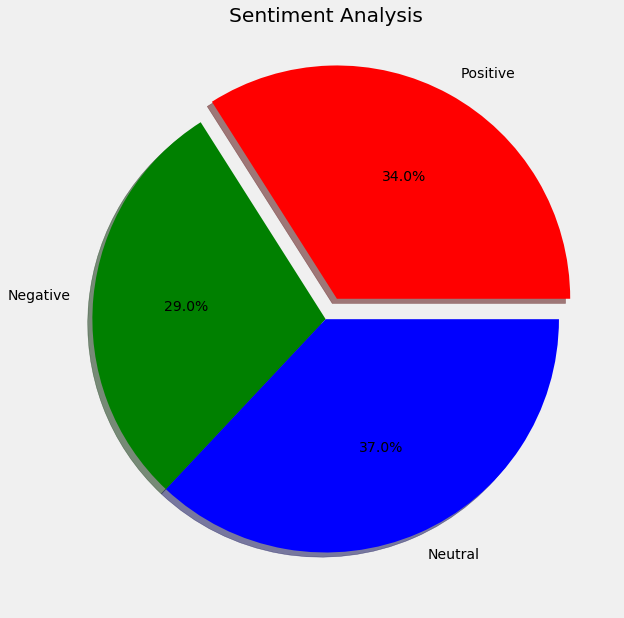

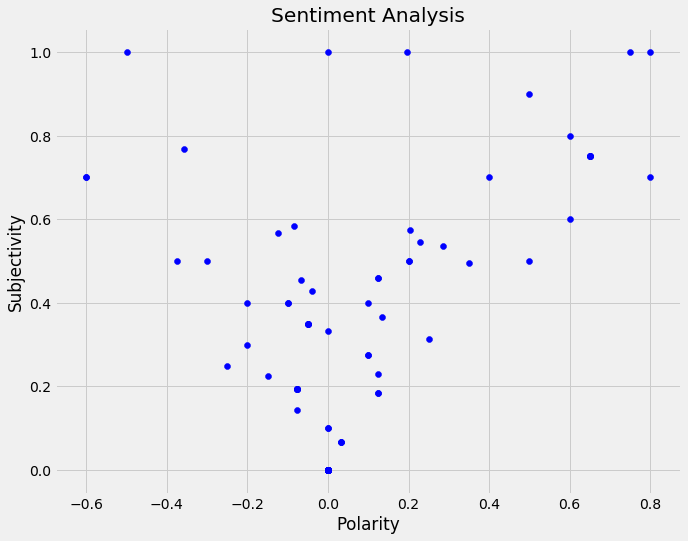

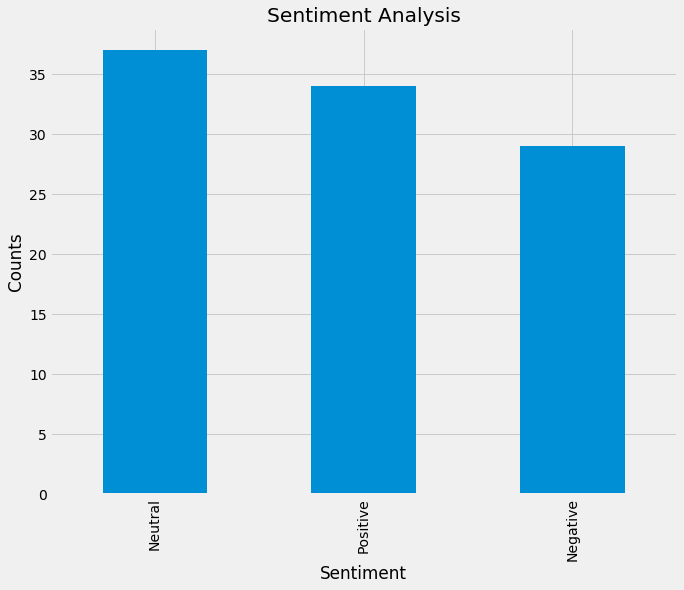

***************************************************Printing positive tweets:*************************************************

1) It's best we do not jump to any conclusions yet Sharri ... a little more patience in these difficult times, is what… 

2) I was searching for face masks online and found this, LOL. CaronaVirus FaceMasks 

3) 8: وزيره_الصحه
Caronavirus 
In this video there are many messages,, I’m proud of my country, King, and crown prince.. 

This i…

4) Was looking forward to putting a bet on the real grand national yesterday but with it been called off with the caronavirus not to be.

5) Warm sunny spring day and we can't go out it's days like this we should be out at the seaside not stuck indoors because of the caronavirus.

6)  Sir, we Indians are proud of your leadership  towards this Novel Caronavirus , We are with you sir, i… 

7) _Law 55645   Are you sure he won't sign it? He already tweeted he wants a fourth… 

8) 8: وزيره_الصحه
Caronavirus 
In this video there are 

In [ ]:
import tweepy 
import re
from tkinter import *
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

consumerKey = 'Add your consumer key'
consumerSecret = 'Add your consumerSecret'
accessToken = 'Add your accessToken'
accessTokenSecret = 'Add your accessTokenSecret'

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

#GUI
root = Tk()

label1 = Label(root, text="Search")
E1 = Entry(root, bd =5)

label2 = Label(root, text="Sample Size")
E2 = Entry(root, bd =5)

def getE1():
    return E1.get()

def getE2():
    return E2.get()

def getData():
    getE1()
    keyword = getE1()
    

    getE2()
    numberOfTweets = getE2()
    numberOfTweets = int(numberOfTweets)
   



    posts = tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets)
    # Extract tweets from the twitter user
   
    tw=[]
    for tweet in posts:
        tw.append(tweet.text)

    # Create a dataframe with a column called Tweets
    df = pd.DataFrame([tweet for tweet in tw], columns=['Tweets'])
   
    

    # Create a function to clean the tweets
    def cleanTxt(text):
        text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
        text = re.sub('#', '', text) # Removing '#' hash tag
        text = re.sub('RT[\s]+', '', text) # Removing RT
        text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink

        return text


    # Clean the tweets
    df['Tweets'] = df['Tweets'].apply(cleanTxt)



    # Create a function to get the subjectivity
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity

    # Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity


    # Create two new columns 'Subjectivity' & 'Polarity'
    df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
    df['Polarity'] = df['Tweets'].apply(getPolarity)

    # Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'


    df['Analysis'] = df['Polarity'].apply(getAnalysis)

    # Show the dataframe
    df


     # Print the percentage of positive tweets
    ptweets = df[df.Analysis == 'Positive']
    ptweets = ptweets['Tweets']
    positive=round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

    # Print the percentage of negative tweets
    ntweets = df[df.Analysis == 'Negative']
    ntweets = ntweets['Tweets']
    negative=round( (ntweets.shape[0] / df.shape[0]) * 100, 1)
   

    # Print the percentage of nuteral tweets
    nutweets = df[df.Analysis == 'Neutral']
    nutweets = nutweets['Tweets']
    neutral=round( (nutweets.shape[0] / df.shape[0]) * 100, 1)
    


     # Plotting
      
    # Plotting pie graph
    plt.figure(figsize=(15,10))
    sli = [positive,negative,neutral]
    activities = ['Positive','Negative','Neutral']
    cols = ['r','g','b']
    plt.pie(sli, labels=activities, colors=cols, shadow= True, explode=(0.1,0,0), autopct='%1.1f%%')
    plt.title('Sentiment Analysis')
    plt.show()
        
        
        
    plt.figure(figsize=(10,8))
    for i in range(0, df.shape[0]):
        plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show()



  

    # Show the value counts
    df['Analysis'].value_counts()

    # Plotting and visualizing the counts
    plt.figure(figsize=(10,8))
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    df['Analysis'].value_counts().plot(kind='bar')
    plt.show()


    # Printing positive tweets 
    print('***************************************************Printing positive tweets:*************************************************\n')
    j=1
    sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
    for i in range(0, sortedDF.shape[0] ):
        if( sortedDF['Analysis'][i] == 'Positive'):
            print(str(j) + ') '+ sortedDF['Tweets'][i])
            print()
            j= j+1

    # Printing negative tweets  
    print('\n\n\n\n\n\n\n\n\n\n*************************************************Printing negative tweets:*****************************************************\n')
    j=1
    sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
    for i in range(0, sortedDF.shape[0] ):
        if( sortedDF['Analysis'][i] == 'Negative'):
            print(str(j) + ') '+sortedDF['Tweets'][i])
            print()
            j=j+1

    # Printing nuteral tweets  
    print('\n\n\n\n\n\n\n\n\n\n********************************************************Printing nuteral tweets:*****************************************************\n')
    j=1
    sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
    for i in range(0, sortedDF.shape[0] ):
        if( sortedDF['Analysis'][i] == 'Neutral'):
            print(str(j) + ') '+sortedDF['Tweets'][i])
            print()
            j=j+1
submit = Button(root, text ="Submit", command = getData)

label1.pack()
E1.pack()
label2.pack()
E2.pack()
submit.pack(side =BOTTOM)
    
root.mainloop()